<a href="https://colab.research.google.com/github/TharunkishoreJ/Python_Projects/blob/main/Delivery_Case_Sudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [56]:
df = pd.read_csv("/content/delhivery_data.csv")
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [58]:
df.isnull().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


In [59]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144316 non-null  object 
 1   trip_creation_time              144316 non-null  object 
 2   route_schedule_uuid             144316 non-null  object 
 3   route_type                      144316 non-null  object 
 4   trip_uuid                       144316 non-null  object 
 5   source_center                   144316 non-null  object 
 6   source_name                     144316 non-null  object 
 7   destination_center              144316 non-null  object 
 8   destination_name                144316 non-null  object 
 9   od_start_time                   144316 non-null  object 
 10  od_end_time                     144316 non-null  object 
 11  start_scan_to_end_scan          144316 non-null  float64
 12  is_cutoff            

In [60]:
df.isnull().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,0
destination_center,0
destination_name,0
od_start_time,0


In [61]:
# First level aggregation by trip_uuid, source_center, and destination_center
agg_functions_level_1 = {
    'start_scan_to_end_scan': 'sum',
    'actual_distance_to_destination': 'sum',
    'actual_time': 'sum',
    'osrm_time': 'sum',
    'osrm_distance': 'sum',
    'segment_actual_time': 'sum',
    'segment_osrm_time': 'sum',
    'segment_osrm_distance': 'sum',
    'cutoff_factor': 'first',
    'is_cutoff': 'first',
    'trip_creation_time': 'first',
    'cutoff_timestamp': 'first',
}

df_level_1 = df.groupby(['trip_uuid', 'source_center', 'destination_center']).agg(agg_functions_level_1).reset_index()

# Second level aggregation by trip_uuid only
agg_functions_level_2 = {
    'start_scan_to_end_scan': 'sum',
    'actual_distance_to_destination': 'sum',
    'actual_time': 'sum',
    'osrm_time': 'sum',
    'osrm_distance': 'sum',
    'segment_actual_time': 'sum',
    'segment_osrm_time': 'sum',
    'segment_osrm_distance': 'sum',
    'cutoff_factor': 'first',
    'is_cutoff': 'first',
    'trip_creation_time': 'first',
    'cutoff_timestamp': 'last',  # Example: last timestamp in the trip
    'source_center': 'first',
    'destination_center': 'last',
}

df_final = df_level_1.groupby('trip_uuid').agg(agg_functions_level_2).reset_index()

# df_final now has the aggregated data


In [62]:
df_final.head()

,trip_uuid,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,cutoff_factor,is_cutoff,trip_creation_time,cutoff_timestamp,source_center,destination_center
0,trip-153671041653548748,43659.0,8860.812105,15682.0,7787.0,10577.7647,1548.0,1008.0,1320.4733,22,True,2018-09-12 00:00:16.535741,2018-09-12 14:56:29,IND209304AAA,IND209304AAA
1,trip-153671042288605164,906.0,240.208306,399.0,210.0,269.4308,141.0,65.0,84.1894,9,True,2018-09-12 00:00:22.886430,2018-09-12 01:39:28,IND561203AAB,IND561203AAB
2,trip-153671043369099517,248631.0,68163.502238,112225.0,65768.0,89447.2488,3308.0,1941.0,2545.2678,22,True,2018-09-12 00:00:33.691250,2018-09-14 00:30:34,IND000000ACB,IND000000ACB
3,trip-153671046011330457,200.0,28.529648,82.0,24.0,31.6475,59.0,16.0,19.8766,9,True,2018-09-12 00:01:00.113710,2018-09-12 01:13:56,IND400072AAB,IND401104AAA
4,trip-153671052974046625,1586.0,239.007304,556.0,207.0,266.2914,340.0,115.0,146.7919,22,True,2018-09-12 00:02:09.740725,2018-09-12 03:03:27,IND583101AAA,IND583119AAA


In [63]:
import re

# Create a new DataFrame with only the 'destination_name' column
df1 = pd.DataFrame({'destination_name': df['destination_name']})

# Define a function to extract city, place_code, and state
def extract_destination_features(destination):
    # Use regular expressions to capture the parts
    match = re.match(r"([A-Za-z]+)_([A-Za-z0-9_]+) \((.+)\)", destination)
    if match:
        city = match.group(1).strip()
        place_code = match.group(2).strip()
        state = match.group(3).strip()
        return pd.Series([city, place_code, state])
    else:
        return pd.Series([None, None, None])

# Apply the function to the destination_name column
df1= df1['destination_name'].apply(extract_destination_features)

# View the result
print(df1)


               0            1        2
0       Khambhat   MotvdDPP_D  Gujarat
1       Khambhat   MotvdDPP_D  Gujarat
2       Khambhat   MotvdDPP_D  Gujarat
3       Khambhat   MotvdDPP_D  Gujarat
4       Khambhat   MotvdDPP_D  Gujarat
...          ...          ...      ...
144862   Gurgaon  Bilaspur_HB  Haryana
144863   Gurgaon  Bilaspur_HB  Haryana
144864   Gurgaon  Bilaspur_HB  Haryana
144865   Gurgaon  Bilaspur_HB  Haryana
144866   Gurgaon  Bilaspur_HB  Haryana

[144316 rows x 3 columns]


In [64]:
# Create a new DataFrame with only the 'source_name' column
df2 = pd.DataFrame({'source_name': df['source_name']})

# Define a function to extract city, place_code, and state
def extract_destination_features(destination):
    # Use regular expressions to capture the parts
    match = re.match(r"([A-Za-z]+)_([A-Za-z0-9_]+) \((.+)\)", destination)
    if match:
        city = match.group(1).strip()
        place_code = match.group(2).strip()
        state = match.group(3).strip()
        return pd.Series([city, place_code, state])
    else:
        return pd.Series([None, None, None])

# Apply the function to the source_name column
df2= df2['source_name'].apply(extract_destination_features)

# View the result
print(df2)

              0           1        2
0         Anand  VUNagar_DC  Gujarat
1         Anand  VUNagar_DC  Gujarat
2         Anand  VUNagar_DC  Gujarat
3         Anand  VUNagar_DC  Gujarat
4         Anand  VUNagar_DC  Gujarat
...         ...         ...      ...
144862  Sonipat    Kundli_H  Haryana
144863  Sonipat    Kundli_H  Haryana
144864  Sonipat    Kundli_H  Haryana
144865  Sonipat    Kundli_H  Haryana
144866  Sonipat    Kundli_H  Haryana

[144316 rows x 3 columns]


In [65]:
# Create a new DataFrame with only the 'trip_creation_time' column
df3 = pd.DataFrame({'trip_creation_time': pd.to_datetime(df['trip_creation_time'])})

# df3['trip_creation_time'] = pd.to_datetime(df3['trip_creation_time'])

# Extract year, month, and day
df3['year'] = df3['trip_creation_time'].dt.year
df3['month'] = df3['trip_creation_time'].dt.month
df3['day'] = df3['trip_creation_time'].dt.day


# View the result
print(df3)

               trip_creation_time  year  month  day
0      2018-09-20 02:35:36.476840  2018      9   20
1      2018-09-20 02:35:36.476840  2018      9   20
2      2018-09-20 02:35:36.476840  2018      9   20
3      2018-09-20 02:35:36.476840  2018      9   20
4      2018-09-20 02:35:36.476840  2018      9   20
...                           ...   ...    ...  ...
144862 2018-09-20 16:24:28.436231  2018      9   20
144863 2018-09-20 16:24:28.436231  2018      9   20
144864 2018-09-20 16:24:28.436231  2018      9   20
144865 2018-09-20 16:24:28.436231  2018      9   20
144866 2018-09-20 16:24:28.436231  2018      9   20

[144316 rows x 4 columns]


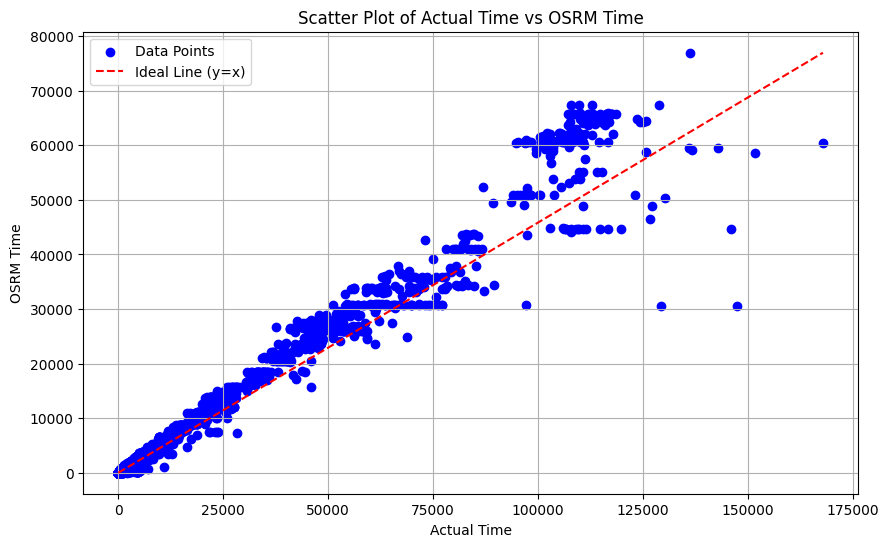

In [66]:
plt.figure(figsize=(10, 6))
plt.scatter(df_final['actual_time'], df_final['osrm_time'], color='blue', label='Data Points')
plt.plot([df_final['actual_time'].min(), df_final['actual_time'].max()],
         [df_final['osrm_time'].min(), df_final['osrm_time'].max()],
         color='red', linestyle='--', label='Ideal Line (y=x)')
plt.xlabel('Actual Time')
plt.ylabel('OSRM Time')
plt.title('Scatter Plot of Actual Time vs OSRM Time')
plt.legend()
plt.grid(True)
plt.show()


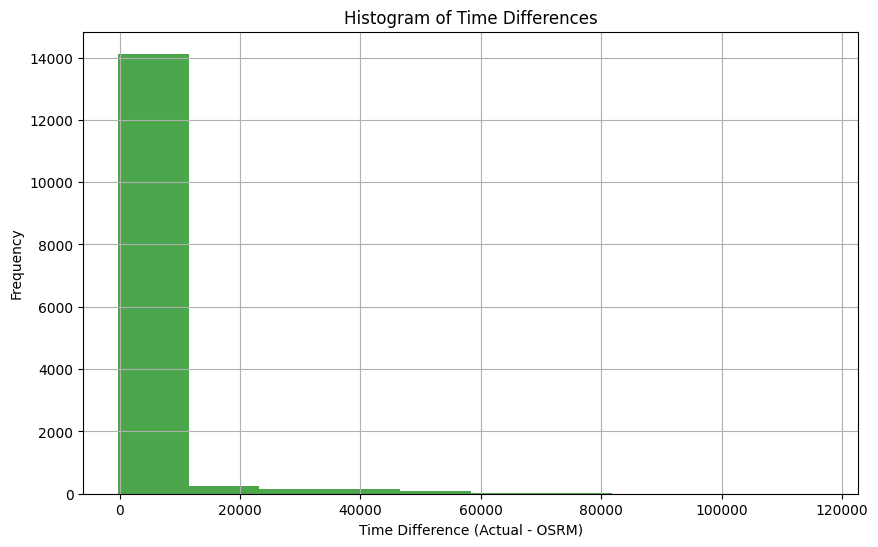

In [67]:
df_final['time_difference'] = df_final['actual_time'] - df_final['osrm_time']
plt.figure(figsize=(10, 6))
plt.hist(df_final['time_difference'], bins=10, color='green', alpha=0.7)
plt.xlabel('Time Difference (Actual - OSRM)')
plt.ylabel('Frequency')
plt.title('Histogram of Time Differences')
plt.grid(True)
plt.show()

In [68]:
t_stat, p_value = stats.ttest_rel(df_final['actual_time'], df_final['osrm_time'])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Check result
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between actual_time and osrm_time.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between actual_time and osrm_time.")

T-statistic: 32.42514605229827
P-value: 7.093080524136582e-223
Reject the null hypothesis: There is a significant difference between actual_time and osrm_time.


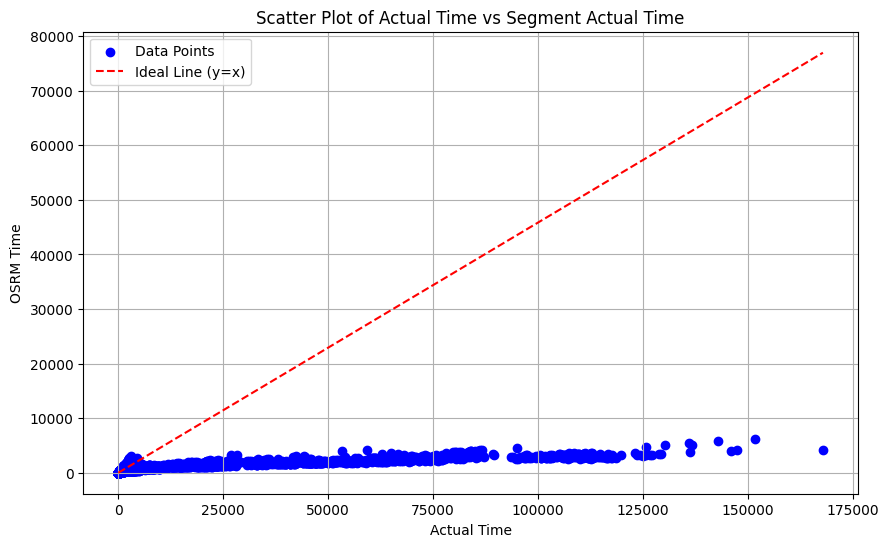

In [69]:
plt.figure(figsize=(10, 6))
plt.scatter(df_final['actual_time'], df_final['segment_actual_time'], color='blue', label='Data Points')
plt.plot([df_final['actual_time'].min(), df_final['actual_time'].max()],
         [df_final['osrm_time'].min(), df_final['osrm_time'].max()],
         color='red', linestyle='--', label='Ideal Line (y=x)')
plt.xlabel('Actual Time')
plt.ylabel('OSRM Time')
plt.title('Scatter Plot of Actual Time vs Segment Actual Time')
plt.legend()
plt.grid(True)
plt.show()


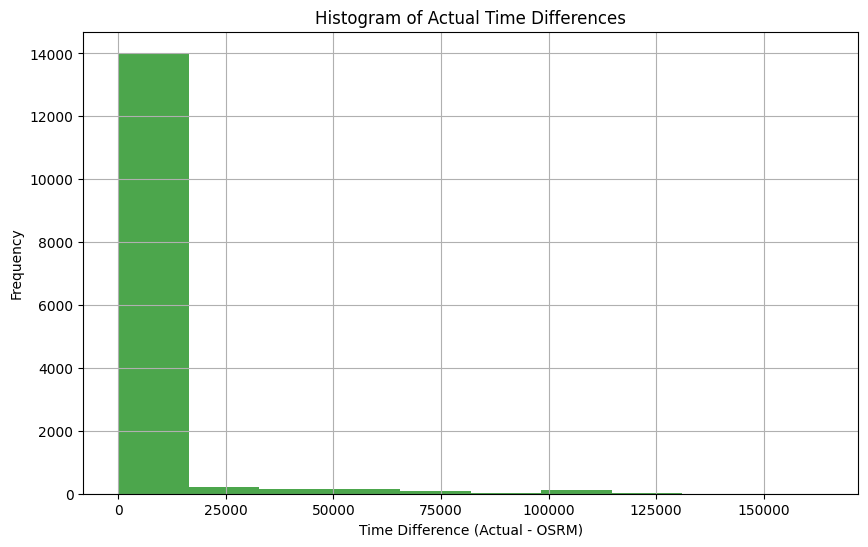

In [70]:
df_final['time_difference'] = df_final['actual_time'] - df_final['segment_actual_time']
plt.figure(figsize=(10, 6))
plt.hist(df_final['time_difference'], bins=10, color='green', alpha=0.7)
plt.xlabel('Time Difference (Actual - OSRM)')
plt.ylabel('Frequency')
plt.title('Histogram of Actual Time Differences')
plt.grid(True)
plt.show()

In [71]:
t_stat, p_value = stats.ttest_rel(df_final['actual_time'], df_final['segment_actual_time'])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Check result
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between actual_time and segment_actual_time.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between actual_time and segment_actual_time.")

T-statistic: 30.72706647859036
P-value: 4.8644719358330334e-201
Reject the null hypothesis: There is a significant difference between actual_time and segment_actual_time.


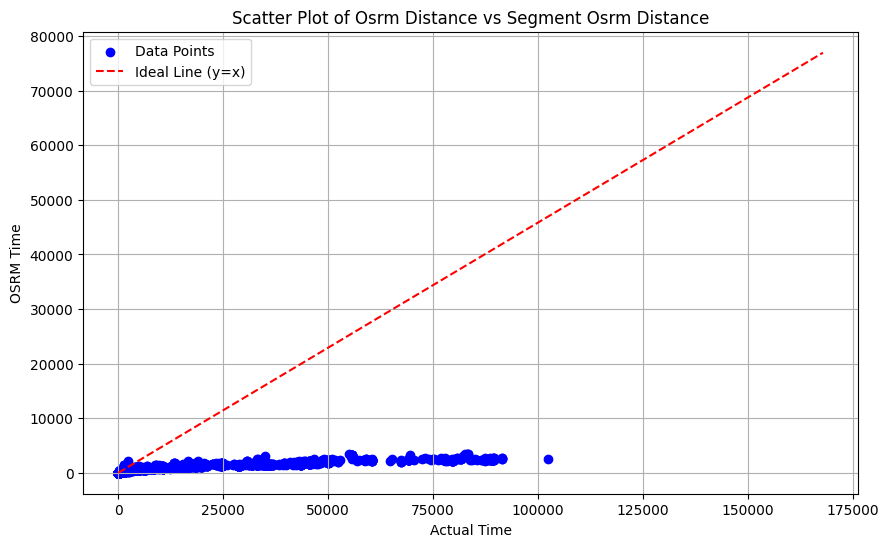

In [72]:
plt.figure(figsize=(10, 6))
plt.scatter(df_final['osrm_distance'], df_final['segment_osrm_distance'], color='blue', label='Data Points')
plt.plot([df_final['actual_time'].min(), df_final['actual_time'].max()],
         [df_final['osrm_time'].min(), df_final['osrm_time'].max()],
         color='red', linestyle='--', label='Ideal Line (y=x)')
plt.xlabel('Actual Time')
plt.ylabel('OSRM Time')
plt.title('Scatter Plot of Osrm Distance vs Segment Osrm Distance')
plt.legend()
plt.grid(True)
plt.show()


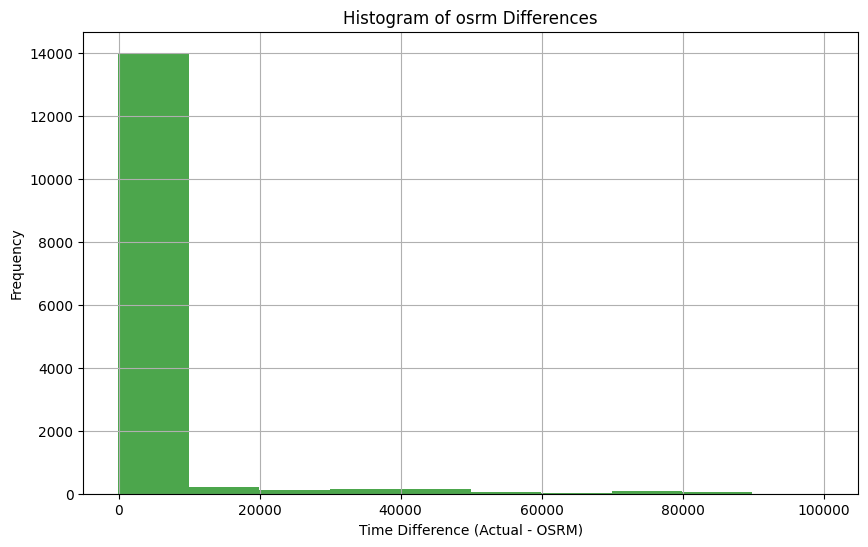

In [73]:
df_final['time_difference'] = df_final['osrm_distance'] - df_final['segment_osrm_distance']
plt.figure(figsize=(10, 6))
plt.hist(df_final['time_difference'], bins=10, color='green', alpha=0.7)
plt.xlabel('Time Difference (Actual - OSRM)')
plt.ylabel('Frequency')
plt.title('Histogram of osrm Differences')
plt.grid(True)
plt.show()

In [74]:
t_stat, p_value = stats.ttest_rel(df_final['osrm_distance'], df_final['segment_osrm_distance'])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Check result
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between osrm_distance and segment_osrm_distance.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between osrm_distance and segment_osrm_distance.")

T-statistic: 30.007054216027875
P-value: 4.3140630591777e-192
Reject the null hypothesis: There is a significant difference between osrm_distance and segment_osrm_distance.


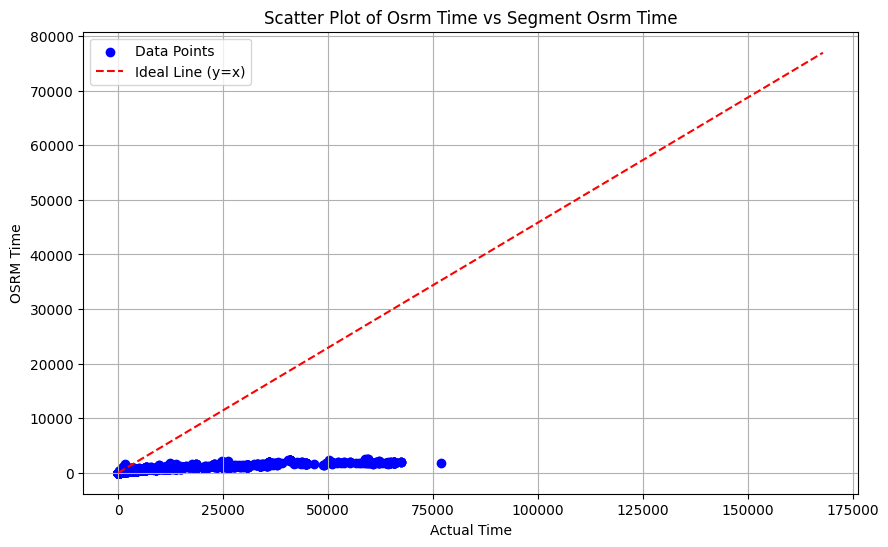

In [75]:
plt.figure(figsize=(10, 6))
plt.scatter(df_final['osrm_time'], df_final['segment_osrm_time'], color='blue', label='Data Points')
plt.plot([df_final['actual_time'].min(), df_final['actual_time'].max()],
         [df_final['osrm_time'].min(), df_final['osrm_time'].max()],
         color='red', linestyle='--', label='Ideal Line (y=x)')
plt.xlabel('Actual Time')
plt.ylabel('OSRM Time')
plt.title('Scatter Plot of Osrm Time vs Segment Osrm Time')
plt.legend()
plt.grid(True)
plt.show()

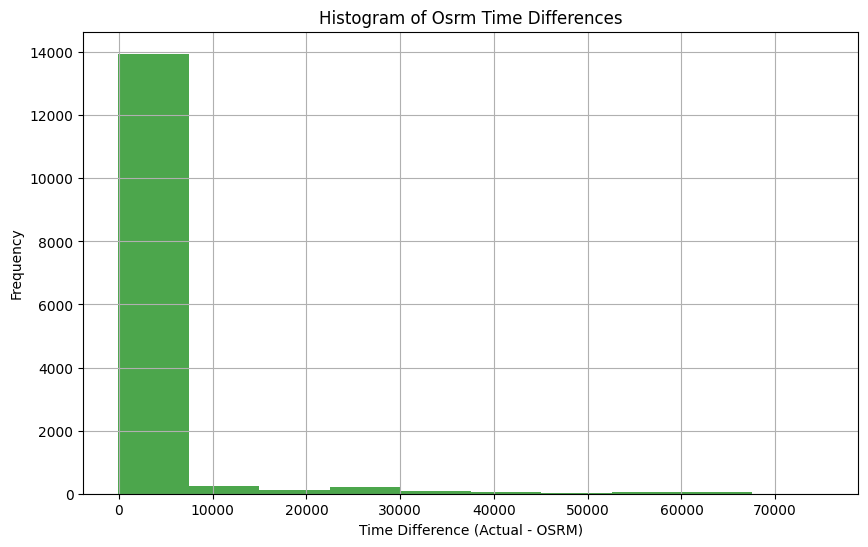

In [76]:
df_final['time_difference'] = df_final['osrm_time'] - df_final['segment_osrm_time']
plt.figure(figsize=(10, 6))
plt.hist(df_final['time_difference'], bins=10, color='green', alpha=0.7)
plt.xlabel('Time Difference (Actual - OSRM)')
plt.ylabel('Frequency')
plt.title('Histogram of Osrm Time Differences')
plt.grid(True)
plt.show()

In [77]:
t_stat, p_value = stats.ttest_rel(df_final['osrm_time'], df_final['segment_osrm_time'])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Check result
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between osrm_time and segment_osrm_time.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between osrm_time and segment_osrm_time.")

T-statistic: 30.272773512286538
P-value: 2.2617929317909094e-195
Reject the null hypothesis: There is a significant difference between osrm_time and segment_osrm_time.


        start_scan_to_end_scan  cutoff_factor  actual_distance_to_destination  \
0                        False          False                           False   
1                        False          False                           False   
2                        False          False                           False   
3                        False          False                           False   
4                        False          False                           False   
...                        ...            ...                             ...   
144862                   False          False                           False   
144863                   False          False                           False   
144864                   False          False                           False   
144865                   False          False                           False   
144866                   False          False                           False   

        actual_time  osrm_t

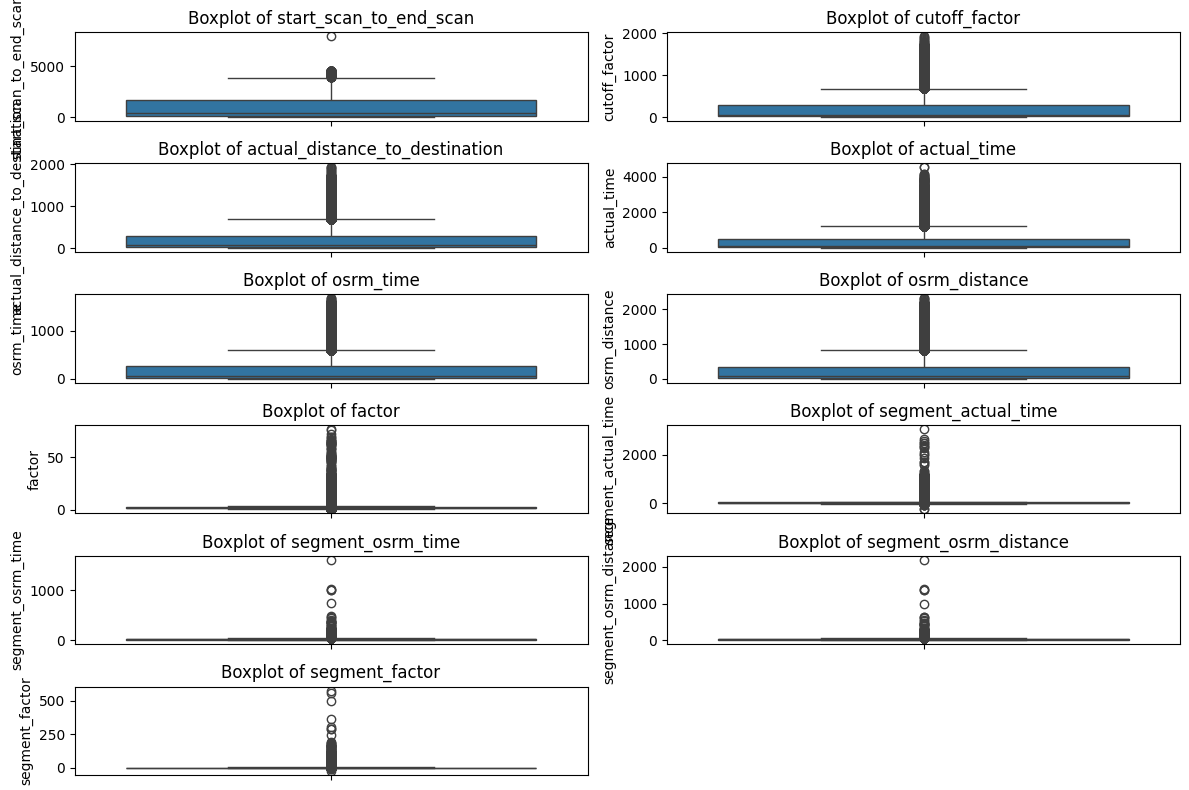

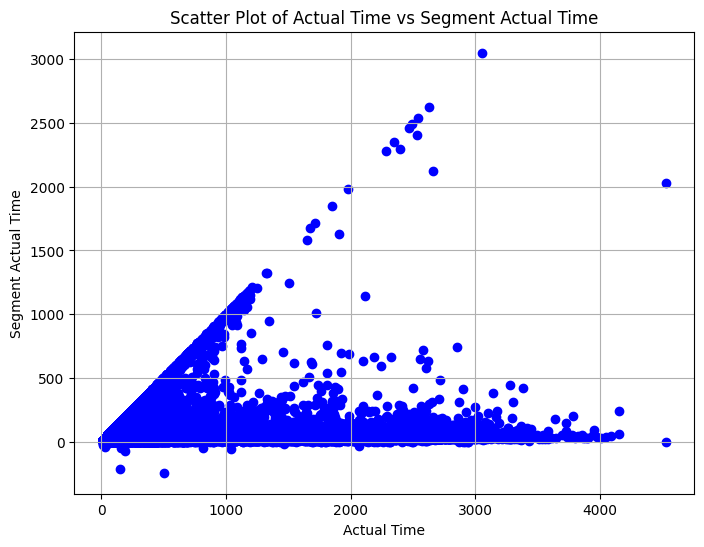

In [81]:
def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))
    return outliers

# Finding outliers in all numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
outliers_df = pd.DataFrame()

for column in numerical_columns:
    outliers_df[column] = find_outliers_iqr(df[column])

# View the outliers (True means an outlier is present)
print(outliers_df)

# Visualizing outliers with boxplots for each numerical column
plt.figure(figsize=(12, 8))
num_rows = int(np.ceil(len(numerical_columns) / 2))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.show()

# Optionally, scatter plot to compare actual_time and segment_actual_time
plt.figure(figsize=(8, 6))
plt.scatter(df['actual_time'], df['segment_actual_time'], color='blue')
plt.xlabel('Actual Time')
plt.ylabel('Segment Actual Time')
plt.title('Scatter Plot of Actual Time vs Segment Actual Time')
plt.grid(True)
plt.show()

In [85]:
# Function to handle outliers using IQR method (capping)
def handle_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    data = np.where(data < lower_bound, lower_bound, data)
    data = np.where(data > upper_bound, upper_bound, data)

    return data

# Apply the function to each numerical column in the dataframe
numerical_columns = df.select_dtypes(include=[np.number]).columns

for column in numerical_columns:
    df[column] = handle_outliers_iqr(df[column])

# View the updated dataframe without outliers
print(df)

            data          trip_creation_time  \
0       training  2018-09-20 02:35:36.476840   
1       training  2018-09-20 02:35:36.476840   
2       training  2018-09-20 02:35:36.476840   
3       training  2018-09-20 02:35:36.476840   
4       training  2018-09-20 02:35:36.476840   
...          ...                         ...   
144862  training  2018-09-20 16:24:28.436231   
144863  training  2018-09-20 16:24:28.436231   
144864  training  2018-09-20 16:24:28.436231   
144865  training  2018-09-20 16:24:28.436231   
144866  training  2018-09-20 16:24:28.436231   

                                      route_schedule_uuid route_type  \
0       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4       thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Ca

In [92]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
df_encoded = pd.get_dummies(df, columns=['route_type'], drop_first = True)
df_encoded.head()

,data,trip_creation_time,route_schedule_uuid,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,route_type_FTL
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,False
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,False
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,False
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,False
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,False


In [95]:
numerical_columns = ['actual_time', 'osrm_time', 'segment_actual_time', 'osrm_distance']

# Initialize scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Apply MinMaxScaler (scaling to [0, 1])
df_encoded_minmax_scaled = df_encoded.copy()
df_encoded_minmax_scaled[numerical_columns] = min_max_scaler.fit_transform(df_encoded[numerical_columns])

# Apply StandardScaler (z-score normalization)
df_encoded_standard_scaled = df_encoded.copy()
df_encoded_standard_scaled[numerical_columns] = standard_scaler.fit_transform(df_encoded[numerical_columns])
# Display the MinMax Scaled and Standard Scaled DataFrames
df_encoded_minmax_scaled


,data,trip_creation_time,route_schedule_uuid,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,route_type_FTL
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,10.435660,0.004151,0.008319,0.003642,1.272727,0.3000,11.0,11.9653,1.272727,False
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,18.936842,0.012453,0.023295,0.015662,1.200000,0.2500,9.0,9.7590,1.111111,False
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,27.637279,0.025737,0.036606,0.028983,1.428571,0.3250,7.0,10.8152,2.285714,False
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,36.118028,0.044002,0.056572,0.045022,1.550000,0.3875,12.0,13.0224,1.750000,False
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,39.386040,0.048983,0.063228,0.055683,1.545455,0.2000,5.0,3.9153,1.200000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,...,45.258278,0.070569,0.089850,0.072569,1.566667,0.2750,12.0,8.1858,1.000000,False
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,...,54.092531,0.092154,0.116473,0.094437,1.578947,0.4500,21.0,17.3725,1.238095,False
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,...,66.163591,0.108759,0.136439,0.108491,1.590909,0.3750,34.0,20.7053,0.588235,False
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,...,73.680667,0.123703,0.153078,0.125953,1.612245,0.3375,27.0,18.8885,0.629630,False


In [96]:
df_encoded_standard_scaled

,data,trip_creation_time,route_schedule_uuid,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,route_type_FTL
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,10.435660,-0.810783,-0.792360,-0.777314,1.272727,-1.001786,11.0,11.9653,1.272727,False
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,18.936842,-0.786370,-0.748992,-0.742823,1.200000,-1.232026,9.0,9.7590,1.111111,False
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,27.637279,-0.747309,-0.710442,-0.704600,1.428571,-0.886666,7.0,10.8152,2.285714,False
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,36.118028,-0.693600,-0.652618,-0.658576,1.550000,-0.598866,12.0,13.0224,1.750000,False
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,39.386040,-0.678953,-0.633343,-0.627984,1.545455,-1.462265,5.0,3.9153,1.200000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,...,45.258278,-0.615479,-0.556244,-0.579531,1.566667,-1.116906,12.0,8.1858,1.000000,False
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,...,54.092531,-0.552005,-0.479144,-0.516781,1.578947,-0.311066,21.0,17.3725,1.238095,False
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,...,66.163591,-0.503179,-0.421320,-0.476455,1.590909,-0.656426,34.0,20.7053,0.588235,False
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,...,73.680667,-0.459236,-0.373133,-0.426348,1.612245,-0.829106,27.0,18.8885,0.629630,False
